# Credit score classification - validation

## 1. Data preparation

### Importing libraries

In [423]:
%%capture --no-stderr

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(29)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report


### Importing dataset

In [424]:
df = pd.read_csv('train.csv', low_memory=False)

### Dividing the dataset into a training set and a validation set

In [425]:
df, X_test, df_target, y_test = train_test_split(
    df_original[df_original.columns.values[:-1]], # X
    df_original[df_original.columns.values[-1]], # y
    test_size=0.30, random_state=42)

### Familiarization with the data

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      63016 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59510 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61973 non-null  object 
 14  De

In [427]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [428]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
76513,0x1d653,CUS_0xa037,February,Aruna Viswanathap,21,318-64-2372,Manager,151649.36,12823.446667,3,...,3.0,Good,358.17,38.252928,29 Years and 11 Months,No,224.703133,763.4809808066542,Low_spent_Large_value_payments,564.1605530687996
60406,0x177f0,CUS_0x1aee,July,Klaymanp,26,065-68-6043,Accountant,100465.13999999998,8279.095000,4,...,2.0,Good,990.2,40.708250,32 Years and 9 Months,No,0.000000,155.12209196021695,High_spent_Large_value_payments,912.787408039783
27322,0xb618,CUS_0x8d56,March,George Georgiopoulosv,37,063-47-6931,Engineer,43395.09,3562.257500,1,...,4.0,_,1103.7,35.041464,32 Years and 7 Months,NM,74.869250,178.811691303449,High_spent_Small_value_payments,362.5448082410094
53699,0x150a5,CUS_0x8a8e,April,Yereth Rosend,34,#F%$D@*&8,Lawyer,80661.32,NaN,5,...,5.0,Standard,1482.15,33.109288,7 Years and 6 Months,Yes,135.562474,232.1346014840457,High_spent_Small_value_payments,547.4805911079858
65412,0x19546,CUS_0x43d0,May,Camposb,3194,309-30-6070,Scientist,81506.32,7012.193333,7,...,5.0,Standard,933.67,27.513472,9 Years and 8 Months,NM,92.506250,318.73385010196097,High_spent_Small_value_payments,549.9792335289444


In [429]:
df['ID'].drop_duplicates().shape[0]

70000

# 2. Data preprocessing

In [430]:
def History_Age_2_months(df):
    df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(' Months', '')
    return df['Credit_History_Age'].str.replace('\D+', '* 12 +')
def Object_to_Numeric(df, s):
    return pd.to_numeric(df[s].str.replace('_', ''))

### to numeric

In [431]:
# Credit_Score to numeric
df_target = df_target.replace('Good', 2)
df_target = df_target.replace('Standard', 1)
df_target = df_target.replace('Poor', 0)

In [432]:
df['Outstanding_Debt'] = Object_to_Numeric(df, 'Outstanding_Debt')
df['Amount_invested_monthly'] = Object_to_Numeric(df, 'Amount_invested_monthly')
df['Changed_Credit_Limit'] = Object_to_Numeric(df, 'Changed_Credit_Limit')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df = df.astype({'Monthly_Balance': 'float'})

In [433]:
df['Credit_History_Age'] = History_Age_2_months(df)
df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()] = df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()].apply(
        lambda x: '-1') # null -1
df['Credit_History_Age'] = df['Credit_History_Age'].apply(eval)

In [434]:
#Dealing with Payment Behaviour
df['Payment_Behaviour'] = np.where(df['Payment_Behaviour']== '!@9#%8', np.nan, df['Payment_Behaviour'])
df['spent'] = np.where('Low' == df['Payment_Behaviour'].str[0:3], 0,1)
df['payment_value'] = df['Payment_Behaviour'].str.extract(r'^(?:[^_]+_){2}([^_ ]+)')

In [435]:
df['payment_value'] = df['payment_value'].replace('Small', 0)
df['payment_value'] = df['payment_value'].replace('Medium', 1)
df['payment_value'] = df['payment_value'].replace('Large', 2)

In [436]:
df = df.drop('Payment_Behaviour', axis=1)

In [437]:
df['Month'] = df['Month'].apply(lambda mname: datetime.strptime(mname, '%B').month)

df['Age'] = df['Age'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

df['Annual_Income'] = df['Annual_Income'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(float)

df['Num_of_Loan'] = df['Num_of_Loan'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].convert_dtypes()
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  int64  
 3   Name                      63016 non-null  object 
 4   Age                       70000 non-null  int32  
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  float64
 8   Monthly_Inhand_Salary     59510 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  int32  
 13  Type_of_Loan              61973 non-null  object 
 14  De

## One-hot

In [439]:
#Type_of_Loan
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '')
df.Type_of_Loan = df.Type_of_Loan.str.split(', ')
df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()] = df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()].apply(lambda x: [])
mlb = MultiLabelBinarizer(sparse_output=True)
df = df.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop('Type_of_Loan')),
        index=df.index,
        columns=mlb.classes_))

In [440]:
df['Credit_Mix'].value_counts()

Standard    25529
Good        17147
_           14143
Bad         13181
Name: Credit_Mix, dtype: int64

In [441]:
#credit_mix one-hot
one_hot_encoded = pd.get_dummies(df['Credit_Mix'], prefix='Credit_Mix')
df = pd.concat([df, one_hot_encoded], axis=1)

In [442]:
df.Occupation.unique()

array(['Manager', 'Accountant', 'Engineer', 'Lawyer', 'Scientist',
       'Musician', 'Developer', 'Journalist', 'Mechanic', '_______',
       'Doctor', 'Media_Manager', 'Teacher', 'Writer', 'Entrepreneur',
       'Architect'], dtype=object)

In [443]:
#Occupation one-hot
one_hot_encoded = pd.get_dummies(df['Occupation'], prefix='Occupation')
df = pd.concat([df, one_hot_encoded], axis=1)

In [444]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [445]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0])

In [446]:
#min_amount one-hot
one_hot_encoded = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
df = pd.concat([df, one_hot_encoded], axis=1)

In [447]:
### Dropping irrelevant columns

In [448]:
df.drop(columns=['ID','Customer_ID','Name'], inplace=True)

In [449]:
df.drop(columns=['Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Payment_of_Min_Amount'], inplace=True)

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Month                      70000 non-null  int64           
 1   Age                        70000 non-null  int32           
 2   SSN                        70000 non-null  object          
 3   Annual_Income              70000 non-null  float64         
 4   Monthly_Inhand_Salary      59510 non-null  float64         
 5   Num_Bank_Accounts          70000 non-null  int64           
 6   Num_Credit_Card            70000 non-null  int64           
 7   Interest_Rate              70000 non-null  int64           
 8   Num_of_Loan                70000 non-null  int32           
 9   Delay_from_due_date        70000 non-null  int64           
 10  Num_of_Delayed_Payment     65073 non-null  float64         
 11  Changed_Credit_Limit       68510 non-

## Replacing with median/mode

In [451]:
df.Monthly_Balance = np.where(df.Monthly_Balance == min(df.Monthly_Balance), np.nan, df.Monthly_Balance)

### Filing according to customer

In [452]:
grouped = df.groupby('SSN')

In [355]:
df.head()

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
76513,2,21,318-64-2372,151649.36,12823.446667,3,7,11,3,7,...,0,0,0,0,0,0,0,0,1,0
60406,7,26,065-68-6043,100465.14,8279.095000,4,3,11,0,3,...,0,0,0,0,0,0,0,0,1,0
27322,3,37,063-47-6931,43395.09,3562.257500,1,3,4,3,11,...,0,0,0,0,0,0,0,1,0,0
53699,4,34,#F%$D@*&8,80661.32,NaN,5,4,30,4,8,...,0,0,0,0,0,0,0,0,0,1
65412,5,3194,309-30-6070,81506.32,7012.193333,7,4,7,2,9,...,0,0,0,1,0,0,0,1,0,0


In [356]:
# still null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Month                      70000 non-null  int64           
 1   Age                        70000 non-null  int32           
 2   SSN                        70000 non-null  object          
 3   Annual_Income              70000 non-null  float64         
 4   Monthly_Inhand_Salary      59510 non-null  float64         
 5   Num_Bank_Accounts          70000 non-null  int64           
 6   Num_Credit_Card            70000 non-null  int64           
 7   Interest_Rate              70000 non-null  int64           
 8   Num_of_Loan                70000 non-null  int32           
 9   Delay_from_due_date        70000 non-null  int64           
 10  Num_of_Delayed_Payment     65073 non-null  float64         
 11  Changed_Credit_Limit       68510 non-

In [357]:
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), inplace=True) 
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True) 
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), inplace=True) 
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median(), inplace=True) 
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True) 
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True) 
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True) 
df['payment_value'].fillna(df['payment_value'].mode()[0], inplace=True) 
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True) 

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Month                      70000 non-null  int64           
 1   Age                        70000 non-null  int32           
 2   SSN                        70000 non-null  object          
 3   Annual_Income              70000 non-null  float64         
 4   Monthly_Inhand_Salary      70000 non-null  float64         
 5   Num_Bank_Accounts          70000 non-null  int64           
 6   Num_Credit_Card            70000 non-null  int64           
 7   Interest_Rate              70000 non-null  int64           
 8   Num_of_Loan                70000 non-null  int32           
 9   Delay_from_due_date        70000 non-null  int64           
 10  Num_of_Delayed_Payment     70000 non-null  float64         
 11  Changed_Credit_Limit       70000 non-

In [359]:
df.drop(columns=['SSN'], inplace=True)

## Outliers and scaling

In [360]:
stdscaler = StandardScaler()
mmscaler = MinMaxScaler()

df = df.reset_index(drop=True)

Annual_Income

In [361]:
df.Annual_Income.describe()

count    7.000000e+04
mean     1.780016e+05
std      1.445765e+06
min      7.005930e+03
25%      1.953184e+04
50%      3.775592e+04
75%      7.281702e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [362]:
#only upper
upper_lim = df.Annual_Income.quantile(.99)
df.Annual_Income = np.where(df.Annual_Income > upper_lim, upper_lim, df.Annual_Income)

df = df.reset_index(drop=True)
df.Annual_Income = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Annual_Income)),columns=['Annual_Income'])

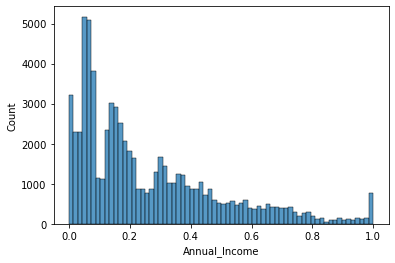

In [363]:
plot_dens=sns.histplot(df['Annual_Income'])

Monthly Balance

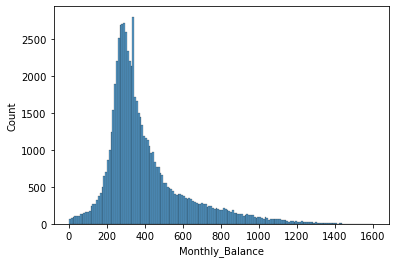

In [364]:
plot_dens=sns.histplot(df['Monthly_Balance'])

In [365]:
df['Monthly_Balance'].min()

0.007759664775335295

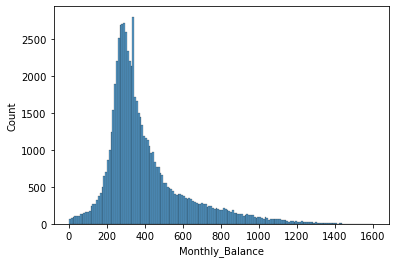

In [366]:
plot_dens=sns.histplot(df['Monthly_Balance'])

Amount_invested_monthly

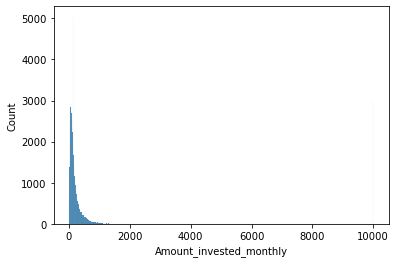

In [367]:
plot_dens=sns.histplot(df['Amount_invested_monthly'])

In [368]:
# upper
upper_lim = df.Amount_invested_monthly.quantile(.98)
df.Amount_invested_monthly = np.where(df.Amount_invested_monthly > upper_lim, upper_lim, df.Amount_invested_monthly)
df.Amount_invested_monthly = np.log1p(df.Amount_invested_monthly)

df = df.reset_index(drop=True)

In [369]:
df.Amount_invested_monthly = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Amount_invested_monthly)),columns=['Amount_invested_monthly'])

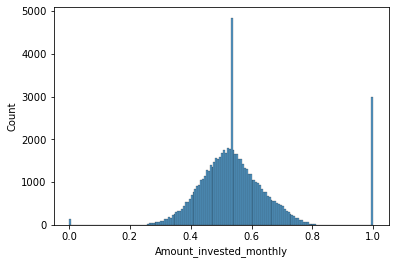

In [370]:
plot_dens=sns.histplot(df['Amount_invested_monthly'])

Total_EMI_per_month

In [371]:
df.Total_EMI_per_month.describe()

count    70000.000000
mean      1424.588024
std       8372.806726
min          0.000000
25%         30.292881
50%         69.266164
75%        162.343223
max      82331.000000
Name: Total_EMI_per_month, dtype: float64

In [372]:
#Ponownie tylko górne
upper_lim = df.Total_EMI_per_month.quantile(.96)
df.Total_EMI_per_month = np.where(df.Total_EMI_per_month > upper_lim, upper_lim, df.Total_EMI_per_month)
df = df.reset_index(drop=True)

df.Total_EMI_per_month = np.log1p(df.Total_EMI_per_month)

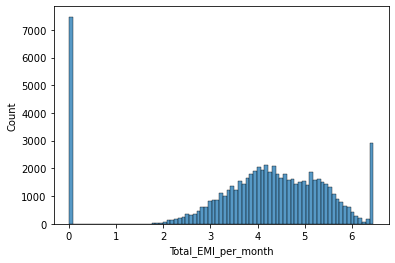

In [373]:
plot_dens=sns.histplot(df['Total_EMI_per_month'])

Credit_Utilization_Ratio

In [374]:
df.Credit_Utilization_Ratio = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Credit_Utilization_Ratio)),columns=['Credit_Utilization_Ratio'])

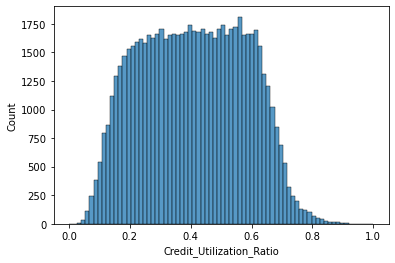

In [375]:
plot_dens=sns.histplot(df['Credit_Utilization_Ratio'])

Outstanding_Debt 

In [376]:
df.Outstanding_Debt = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Outstanding_Debt)),columns=['Outstanding_Debt'])

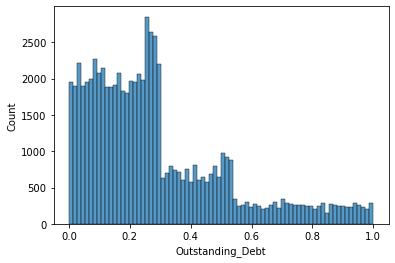

In [377]:
plot_dens=sns.histplot(df['Outstanding_Debt'])

Num_Credit_Inquiries

In [378]:
df.Num_Credit_Inquiries.describe()

count    70000.000000
mean        27.431714
std        191.253094
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [379]:
upper_lim = df.Num_Credit_Inquiries.quantile(.96)
df.Num_Credit_Inquiries = np.where(df.Num_Credit_Inquiries > upper_lim, upper_lim, df.Num_Credit_Inquiries)

df = df.reset_index(drop=True)

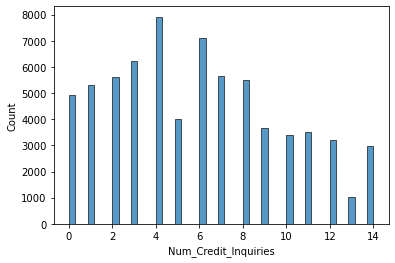

In [380]:
plot_dens=sns.histplot(df['Num_Credit_Inquiries'])

Changed_Credit_Limit

In [381]:
df.Changed_Credit_Limit = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Changed_Credit_Limit)),columns=['Changed_Credit_Limit'])

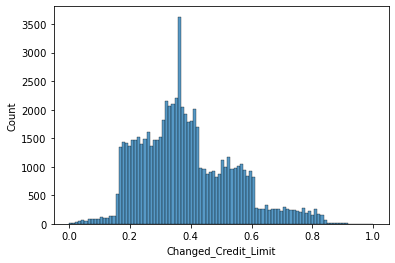

In [382]:
plot_dens=sns.histplot(df['Changed_Credit_Limit'])

Age

In [383]:
df.Age.describe()

count    70000.000000
mean       110.054514
std        684.858905
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [384]:
df[df.Age==14].shape

(847, 52)

In [385]:
upper_lim = df.Age.quantile(.98)
lower_lim = df.Age.quantile(.05)
df.Age = np.where(df.Age > upper_lim, upper_lim, df.Age)
df.Age = np.where(df.Age < lower_lim, lower_lim, df.Age)
df = df.reset_index(drop=True)


df.Age = pd.DataFrame(mmscaler.fit_transform(pd.DataFrame(df.Age)),columns=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

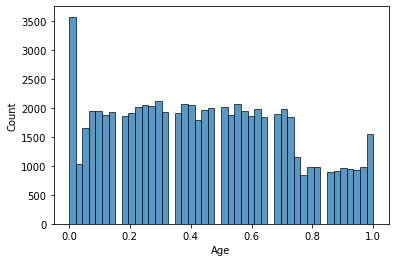

In [386]:
sns.histplot(df.Age)

In [387]:
factor=3

Monthly_Inhand_Salary

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

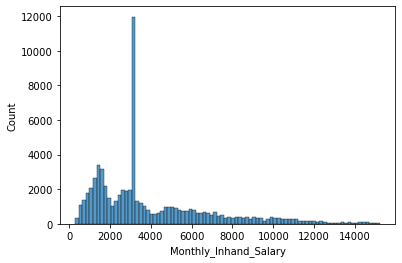

In [388]:
sns.histplot(df.Monthly_Inhand_Salary)

Num_Bank_Accounts

In [389]:
df.Num_Bank_Accounts.describe()

count    70000.000000
mean        17.419629
std        118.820416
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Count'>

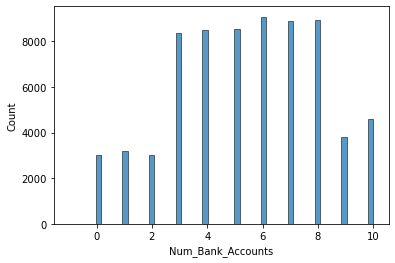

In [390]:
upper_lim = df.Num_Bank_Accounts.quantile(.98)
lower_lim = df.Num_Bank_Accounts.quantile(.00)
df.Num_Bank_Accounts = np.where(df.Num_Bank_Accounts > upper_lim, upper_lim, df.Num_Bank_Accounts)
df.Num_Bank_Accounts = np.where(df.Num_Bank_Accounts < lower_lim, lower_lim, df.Num_Bank_Accounts)
df = df.reset_index(drop=True)

sns.histplot(df.Num_Bank_Accounts)

Num_Credit_Card

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Count'>

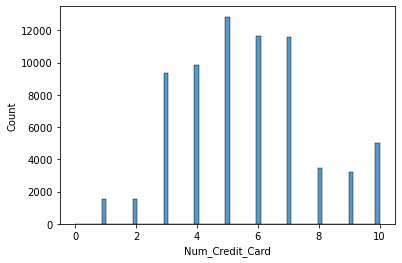

In [391]:
upper_lim = df.Num_Credit_Card.quantile(.97)
lower_lim = df.Num_Credit_Card.quantile(.00)
df.Num_Credit_Card = np.where(df.Num_Credit_Card > upper_lim, upper_lim, df.Num_Credit_Card)
df.Num_Credit_Card = np.where(df.Num_Credit_Card < lower_lim, lower_lim, df.Num_Credit_Card)

df = df.reset_index(drop=True)

sns.histplot(df.Num_Credit_Card)

Interest_Rate

In [392]:
df.Interest_Rate.describe()

count    70000.000000
mean        73.420229
std        471.129553
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

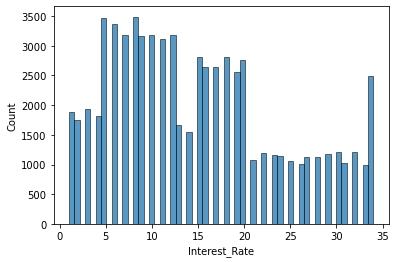

In [393]:
upper_lim = df.Interest_Rate.quantile(.97)
df.Interest_Rate = np.where(df.Interest_Rate > upper_lim, upper_lim, df.Interest_Rate)
df = df.reset_index(drop=True)

sns.histplot(df.Interest_Rate)

Num_of_Loan

In [394]:
df.Num_of_Loan.describe()

count    70000.000000
mean         2.628243
std         59.791596
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1485.000000
Name: Num_of_Loan, dtype: float64

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Count'>

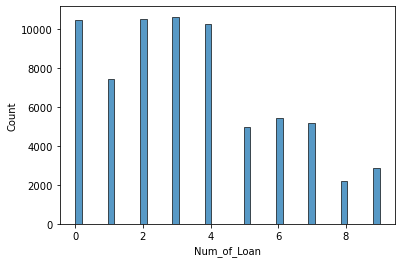

In [395]:
upper_lim = df.Num_of_Loan.quantile(.99)
lower_lim = df.Num_of_Loan.quantile(.04)
df.Num_of_Loan = np.where(df.Num_of_Loan > upper_lim, upper_lim, df.Num_of_Loan)
df.Num_of_Loan = np.where(df.Num_of_Loan < lower_lim, lower_lim, df.Num_of_Loan)
df = df.reset_index(drop=True)

sns.histplot(df.Num_of_Loan)

Delay_from_due_date

In [396]:
df.Delay_from_due_date.describe()

count    70000.000000
mean        21.022671
std         14.836833
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

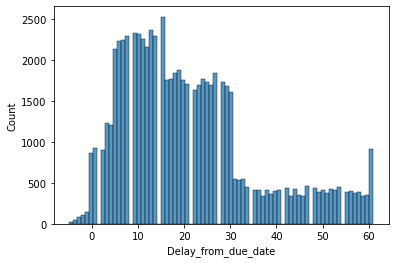

In [397]:
upper_lim = df.Delay_from_due_date.quantile(.99)
df.Delay_from_due_date = np.where(df.Delay_from_due_date > upper_lim, upper_lim, df.Delay_from_due_date)
df = df.reset_index(drop=True)
sns.histplot(df.Delay_from_due_date)

Num_of_Delayed_Payment

In [398]:
df.Num_of_Delayed_Payment.describe()

count    70000.000000
mean        29.970314
std        220.098836
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4388.000000
Name: Num_of_Delayed_Payment, dtype: float64

<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Count'>

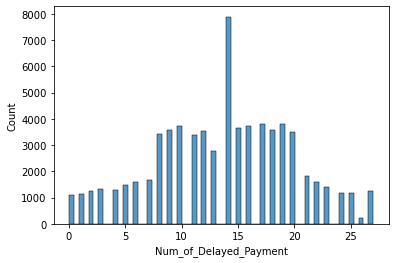

In [399]:
upper_lim = df.Num_of_Delayed_Payment.quantile(.99)
lower_lim = df.Num_of_Delayed_Payment.quantile(.01)
df.Num_of_Delayed_Payment = np.where(df.Num_of_Delayed_Payment > upper_lim, upper_lim, df.Num_of_Delayed_Payment)
df.Num_of_Delayed_Payment = np.where(df.Num_of_Delayed_Payment < lower_lim, upper_lim, df.Num_of_Delayed_Payment)
sns.histplot(df.Num_of_Delayed_Payment)

## Redukcja liczby zmiennych

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Month                      70000 non-null  int64           
 1   Age                        70000 non-null  float64         
 2   Annual_Income              70000 non-null  float64         
 3   Monthly_Inhand_Salary      70000 non-null  float64         
 4   Num_Bank_Accounts          70000 non-null  float64         
 5   Num_Credit_Card            70000 non-null  float64         
 6   Interest_Rate              70000 non-null  float64         
 7   Num_of_Loan                70000 non-null  float64         
 8   Delay_from_due_date        70000 non-null  float64         
 9   Num_of_Delayed_Payment     70000 non-null  float64         
 10  Changed_Credit_Limit       70000 non-null  float64         
 11  Num_Credit_Inquiries       70000 non-null

In [401]:
# nan
df.drop(columns=['payment_value'], inplace = True)

<AxesSubplot:>

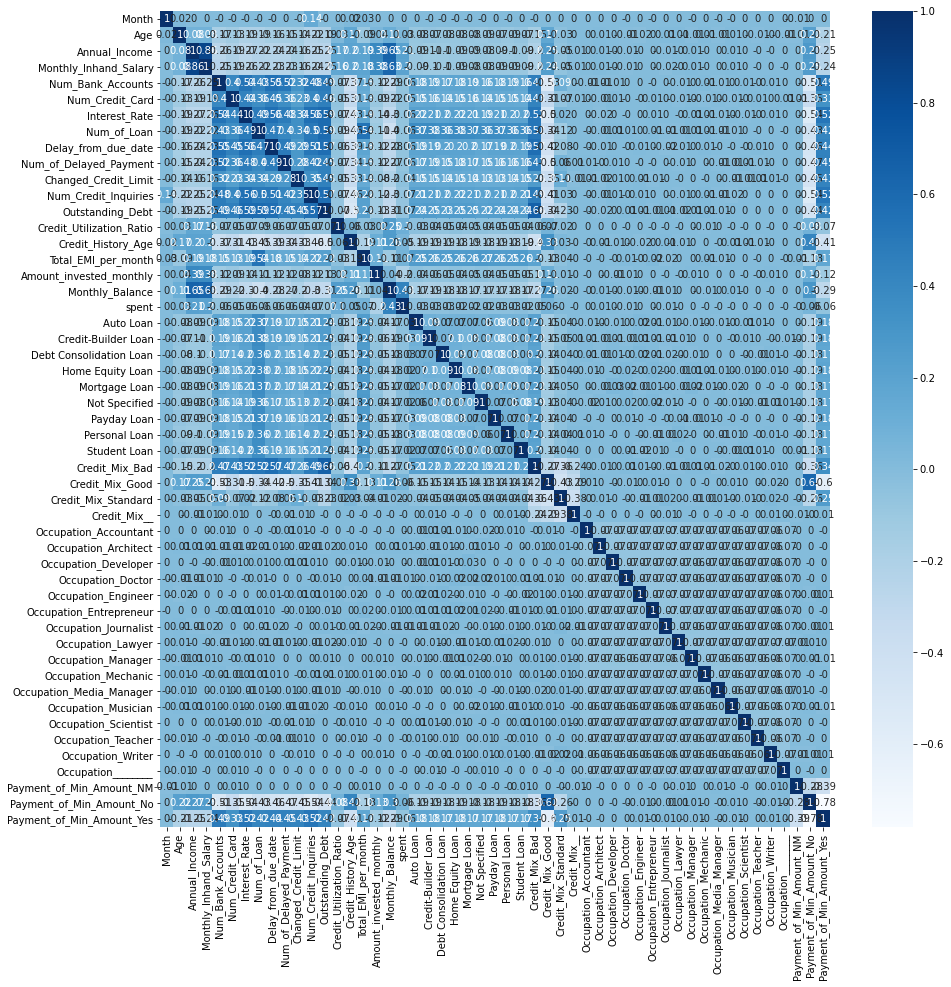

In [402]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr().round(2), cmap="Blues", annot=True)

In [403]:
df.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'spent', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Credit_Mix__', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 

In [404]:
# Month seem to be irrelevant
df = df.drop(columns=['Month'])
df_slim=df.drop(columns=['Personal Loan','Student Loan','Payday Loan','Not Specified','Mortgage Loan', 'Home Equity Loan','Debt Consolidation Loan', 
'Credit-Builder Loan', 'Auto Loan' ], inplace=True)

In [405]:
# Annual income is strongly correlated wuth Monthly Salary

In [406]:
df.Monthly_Inhand_Salary.corr(df_target)

0.0017654328650121536

In [407]:
df.Annual_Income.corr(df_target)

0.00019739586365318958

In [408]:
# Dropping Annual Income which is weaker correlated with df_target
df = df.drop(columns=['Annual_Income'])

<AxesSubplot:>

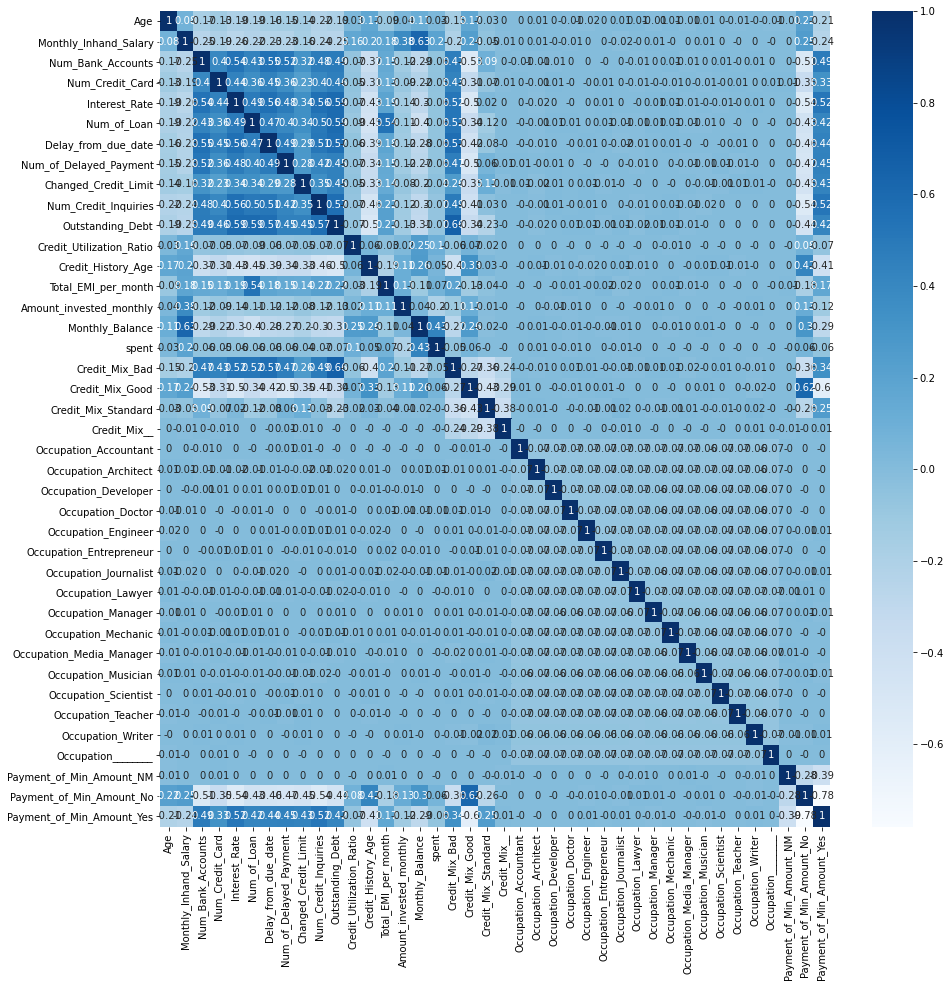

In [409]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr().round(2), cmap="Blues", annot=True)

In [410]:
df.info()
#ready :))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        70000 non-null  float64
 1   Monthly_Inhand_Salary      70000 non-null  float64
 2   Num_Bank_Accounts          70000 non-null  float64
 3   Num_Credit_Card            70000 non-null  float64
 4   Interest_Rate              70000 non-null  float64
 5   Num_of_Loan                70000 non-null  float64
 6   Delay_from_due_date        70000 non-null  float64
 7   Num_of_Delayed_Payment     70000 non-null  float64
 8   Changed_Credit_Limit       70000 non-null  float64
 9   Num_Credit_Inquiries       70000 non-null  float64
 10  Outstanding_Debt           70000 non-null  float64
 11  Credit_Utilization_Ratio   70000 non-null  float64
 12  Credit_History_Age         70000 non-null  int64  
 13  Total_EMI_per_month        70000 non-null  flo

# 3. Models

In [411]:
import warnings
warnings.filterwarnings('ignore')

In [412]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=42)

In [413]:
models = {
    "LR": LogisticRegression(),
    #"SVC": SVC(kernel='sigmoid'),
    #"DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=60),
    #"XGB": XGBClassifier(n_estimators=60),
    #"Naive Bayes": GaussianNB()
}

In [422]:
for name, model in models.items():
    print(f'Training Model {name} \n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Training Model LR 

Training Accuracy: 0.5842244897959183
Testing Accuracy: 0.5904761904761905
Testing Confusion Matrix: 
[[2783 3136  163]
 [1814 8691  661]
 [  74 2752  926]]
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      6082
           1       0.60      0.78      0.68     11166
           2       0.53      0.25      0.34      3752

    accuracy                           0.59     21000
   macro avg       0.57      0.49      0.51     21000
weighted avg       0.58      0.59      0.57     21000

Training Model RF 

Training Accuracy: 0.9998979591836735
Testing Accuracy: 0.7569523809523809
Testing Confusion Matrix: 
[[4577 1297  208]
 [1360 8809  997]
 [  42 1200 2510]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6082
           1       0.78      0.79      0.78     11166
           2       0.68      0.67      0.67      3752

    accuracy                           0.76    